In [5]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema

(67, 765)


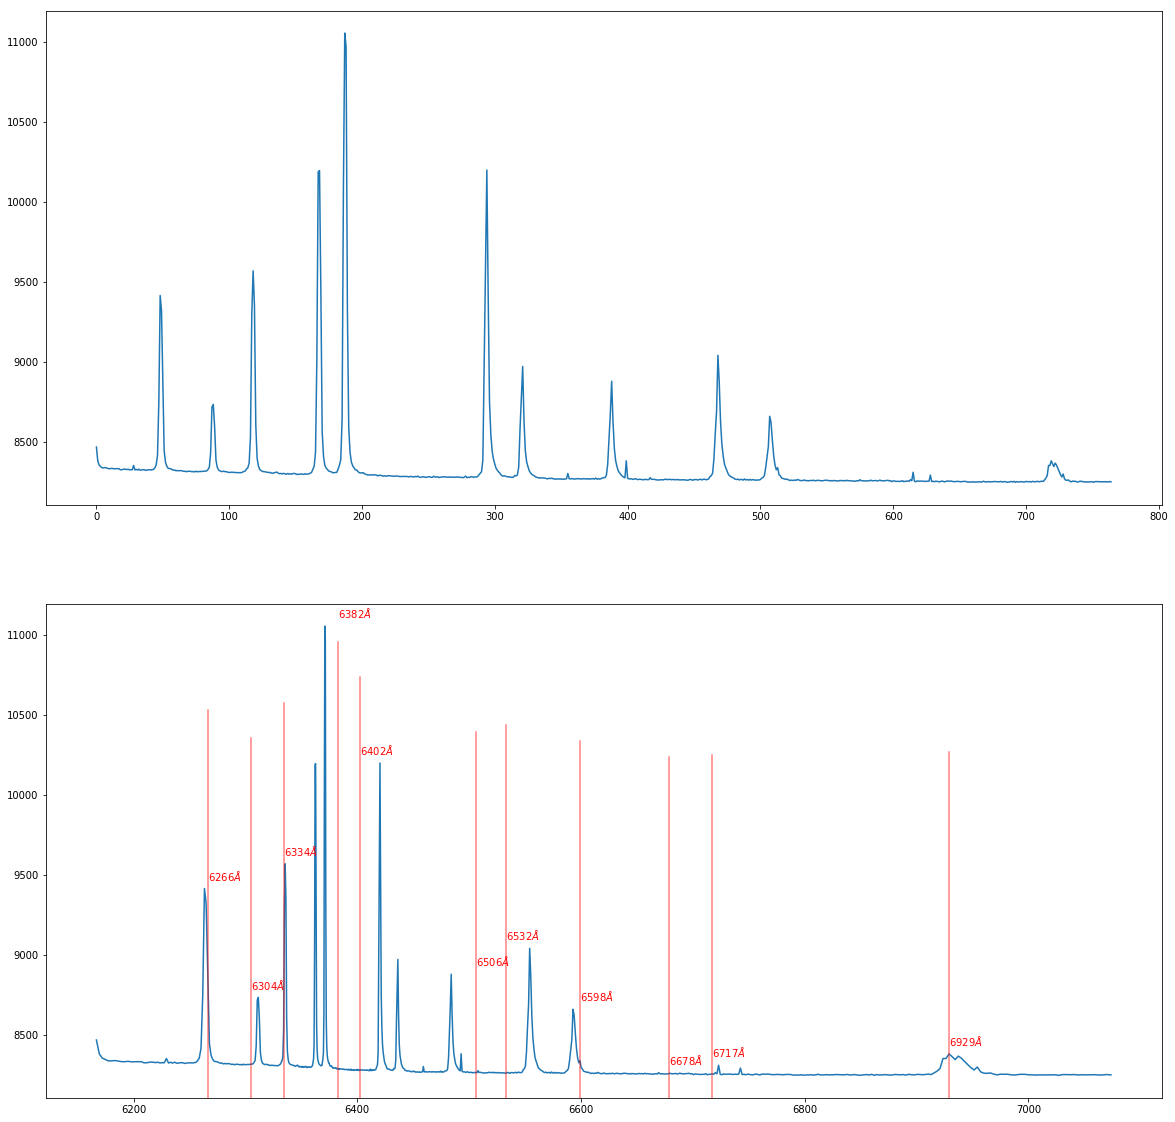

In [19]:
data1,hdr1=fits.getdata('../new_data/lamper_arclamp_spec_2min_new.00000001.FIT',0,header=True)
data2,hdr2=fits.getdata('../new_data/lamper_spec_2min_new.00000000.FIT',0,header=True)

cut50=data1[25:92,:]
#fits.writeto('../cutspec_star_arclamp.fits',cut50,hdr1)
print(cut50.shape)
avgcol_starlamp=np.mean(cut50,axis=0)
pix_pos=np.array([i for i in range(765)])
index_peak=argrelextrema(avgcol_starlamp,np.greater,order=28)
temp=np.array(index_peak)
peak_pos=temp.flatten()
wl=np.array([6266.49,6304.79,6334.43,6382.99,6402.25,6506.53,6532.88,6598.95,6678.28,6717.04,6929.47])
fit=np.polyfit(peak_pos,wl,5)
LnRg=np.poly1d(fit)
exp_wl=LnRg(pix_pos)

fig=plt.figure(figsize=(20,20))
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)

ax1.plot(pix_pos,avgcol_starlamp)
ax2.plot(exp_wl,avgcol_starlamp)
for i in range(len(wl)):
    ax2.axvline(x=wl[i],ymin=0, ymax=(avgcol_starlamp[peak_pos[i]]+10)/12000,c='r',alpha=0.5)
    ax2.text(wl[i],avgcol_starlamp[peak_pos[i]]+50,str(int(wl[i]))+'$\AA$',color='r')



In [109]:
file=fits.open('../new_data/lamper_arclamp_spec_2min_new.00000001.FIT')

In [115]:
file.info()

Filename: ../new_data/lamper_arclamp_spec_2min_new.00000001.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      45   (765, 255)   uint16   


In [116]:
file[0].data

array([[8351, 8312, 8343, ..., 8250, 8258, 8242],
       [8326, 8354, 8343, ..., 8248, 8249, 8255],
       [8321, 8324, 8326, ..., 8252, 8236, 8250],
       ...,
       [8769, 8594, 8380, ..., 8235, 8246, 8255],
       [8832, 8616, 8369, ..., 8250, 8242, 8243],
       [8807, 8642, 8391, ..., 8239, 8254, 8251]], dtype=uint16)

In [15]:
peak_pos

array([ 48,  88, 118, 187, 294, 388, 468, 507, 575, 615, 719])

In [16]:
wl

array([6266.49, 6304.79, 6334.43, 6382.99, 6402.25, 6506.53, 6532.88,
       6598.95, 6678.28, 6717.04, 6929.47])